In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 122)
pd.set_option('display.max_rows', 150)

In [3]:
df = pd.read_csv(r'C:\Users\surya\Desktop\Jupyter Python Programs\Mini Project - Data Mining\clean_credit_card_fraud_detection.csv')
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_YEAR,STD_OF_LIVING_AVG,STD_OF_LIVING_MEDIAN,STD_OF_LIVING_MODE
0,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,1.000000,1.00,0.2,0.01003,-19046,-225.0,-4260.0,-2531,26.00,1,1,1,0.470588,2,2,9,0,0,0,0.192982,0.4040,0.5560,0.7295,0.0,0.0,-815.0,0,0,0,0,0.0,0.212803,0.188466,0.252777
1,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,1.000000,1.00,0.2,0.00802,-19005,-3039.0,-9830.0,-2437,23.75,1,0,0,0.470588,2,2,17,0,0,0,0.087719,0.4968,0.6504,0.6934,0.0,0.0,-617.0,1,0,0,0,0.0,0.212803,0.188466,0.252777
2,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,1.000000,1.00,0.2,0.02866,-19932,-3038.0,-4310.0,-3458,21.50,1,0,0,0.176471,2,2,11,0,1,1,0.649123,0.5894,0.3228,0.6570,0.0,0.0,-1106.0,0,0,0,0,0.0,0.212803,0.188466,0.252777
3,0,0,1,0,1,0,99000.0,490495.5,27517.5,454500.0,0.571429,1.00,0.2,0.03580,-16941,-1588.0,-4970.0,-477,19.25,1,1,1,0.470588,2,2,16,0,0,0,0.578947,0.6820,0.3542,0.6210,0.0,0.0,-2536.0,1,0,0,0,1.0,0.212803,0.188466,0.252777
4,0,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,0.142857,0.25,0.2,0.03580,-13778,-3130.0,-1213.0,-619,17.00,1,0,1,0.000000,2,2,16,0,0,0,0.087719,0.7750,0.7240,0.4920,0.0,0.0,-1562.0,0,0,0,0,2.0,0.212803,0.188466,0.252777


In [14]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_16', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'STD_OF_LIVING_AVG', 'STD_OF_LIVING_MEDIAN', 'STD_OF_LIVING

## Data Visualization

In [6]:
defaulters = df[df['TARGET']==1]
nondefaulters = df[df['TARGET']==0]

### Function for creating the categorical analysis on Defaulters and Non-Defaulters

In [7]:
#function for plotting categories based on defaulters and non-defaulters
def biplot(data, var,label_rotation):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,10))
    s1=sns.barplot(ax=ax1,x=defaulters[var].value_counts().index, data=defaulters, y= 100.* defaulters[var].value_counts(normalize=True))
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90,fontsize=12)
    ax1.set_title('Distribution of '+ '%s' %var +' - Defaulters', fontsize=15)
    ax1.set_xlabel('%s' %var,fontsize=15)
    ax1.set_ylabel("% of Loans",fontsize=15)
   
    s2=sns.barplot(ax=ax2,x=nondefaulters[var].value_counts().index, data=nondefaulters, y= 100.* nondefaulters[var].value_counts(normalize=True))
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90,fontsize=12)
    ax2.set_xlabel('%s' %var, fontsize=15)
    ax2.set_ylabel("% of Loans", fontsize=15)
    ax2.set_title('Distribution of '+ '%s' %var +' - Non-Defaulters', fontsize=15)
    plt.show()

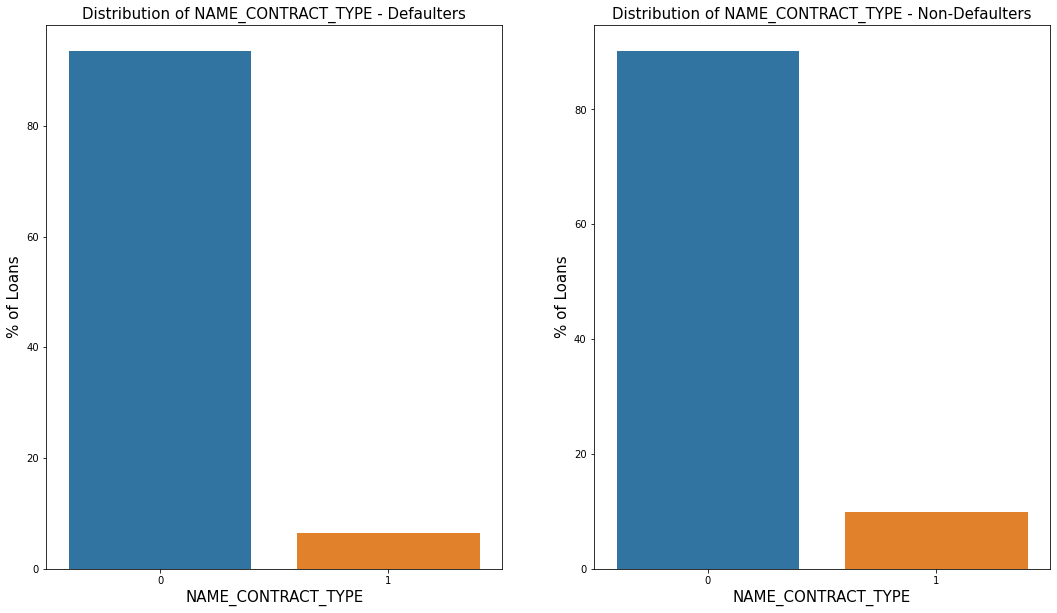

In [8]:
biplot(df, 'NAME_CONTRACT_TYPE', False)

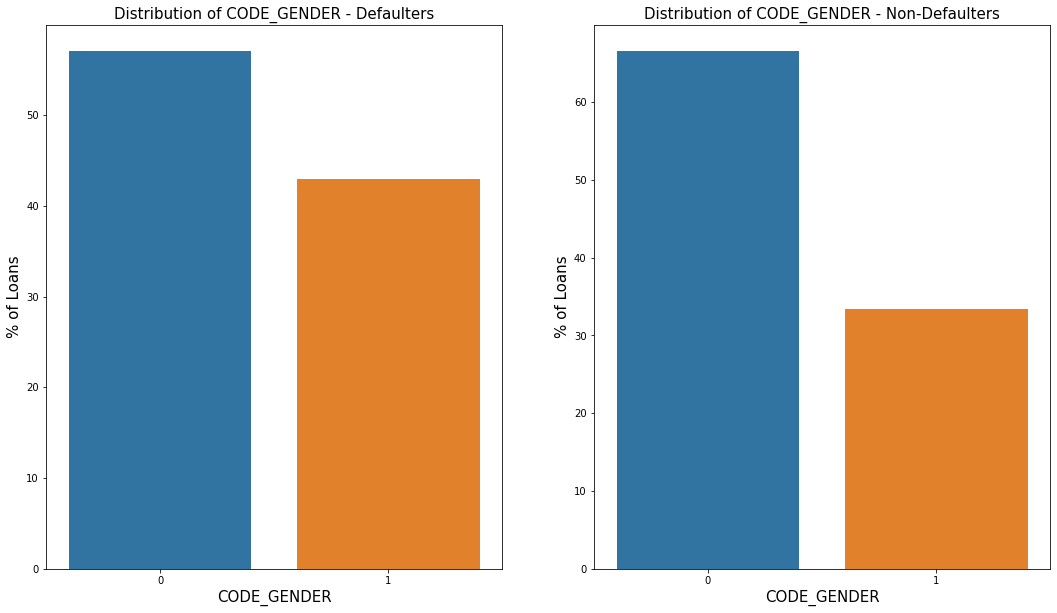

In [9]:
biplot(df, 'CODE_GENDER',False)

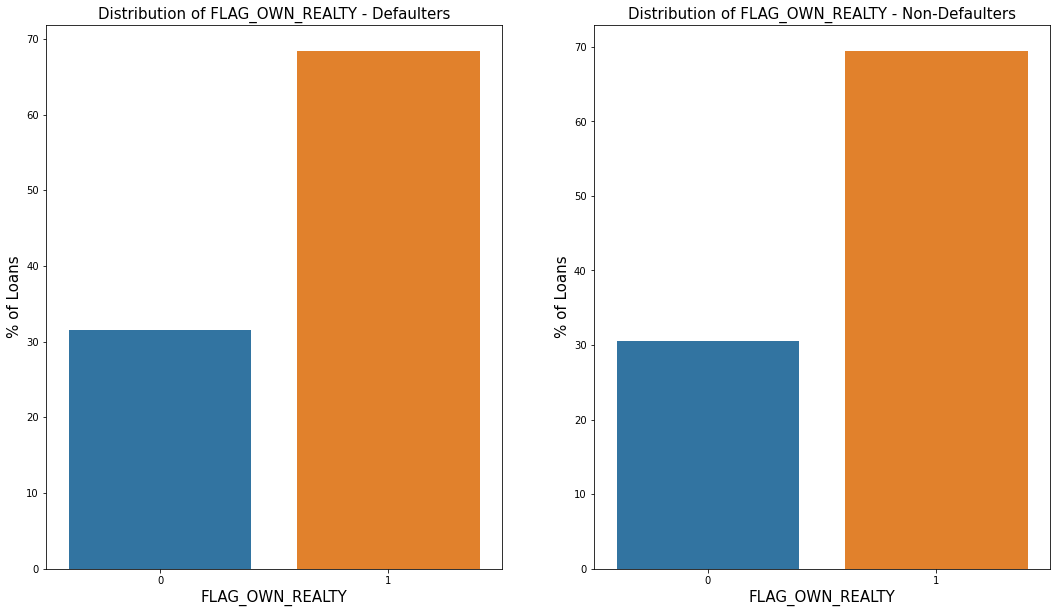

In [10]:
biplot(df, 'FLAG_OWN_REALTY',False)

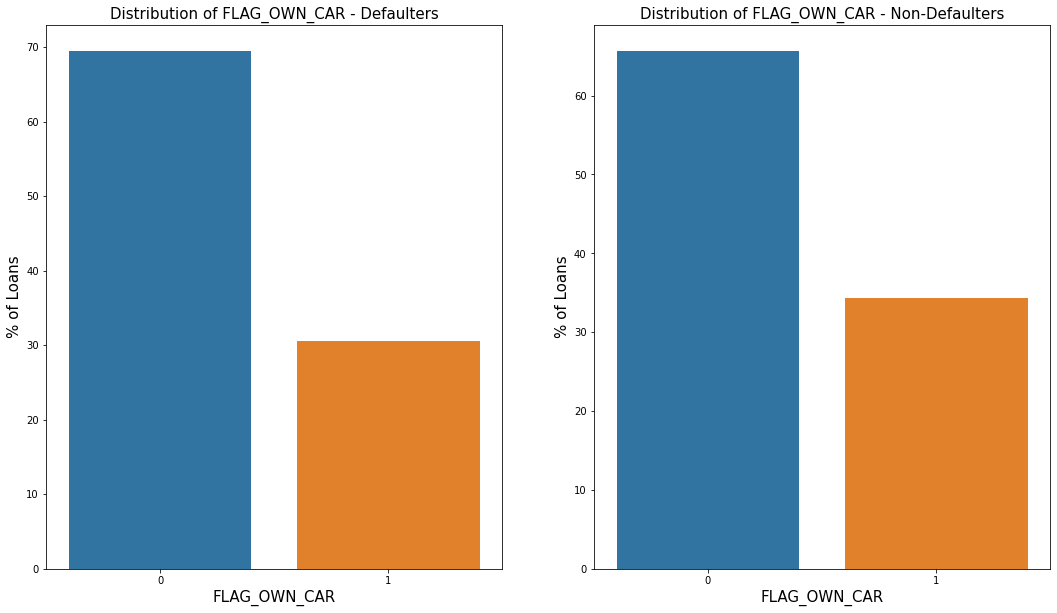

In [11]:
biplot(df, 'FLAG_OWN_CAR', False)

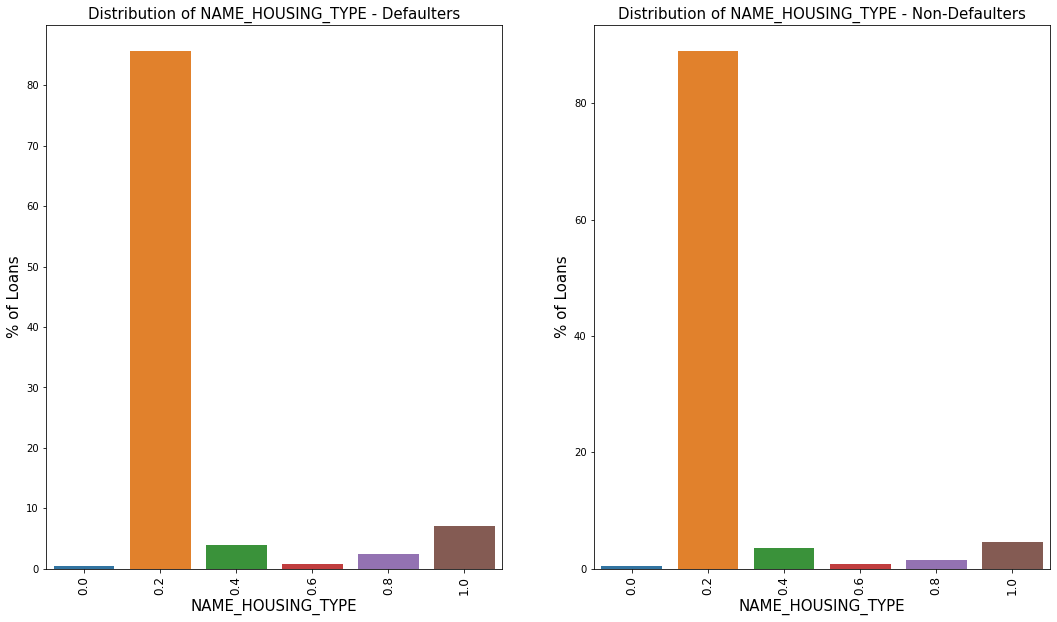

In [12]:
biplot(df, 'NAME_HOUSING_TYPE', True)

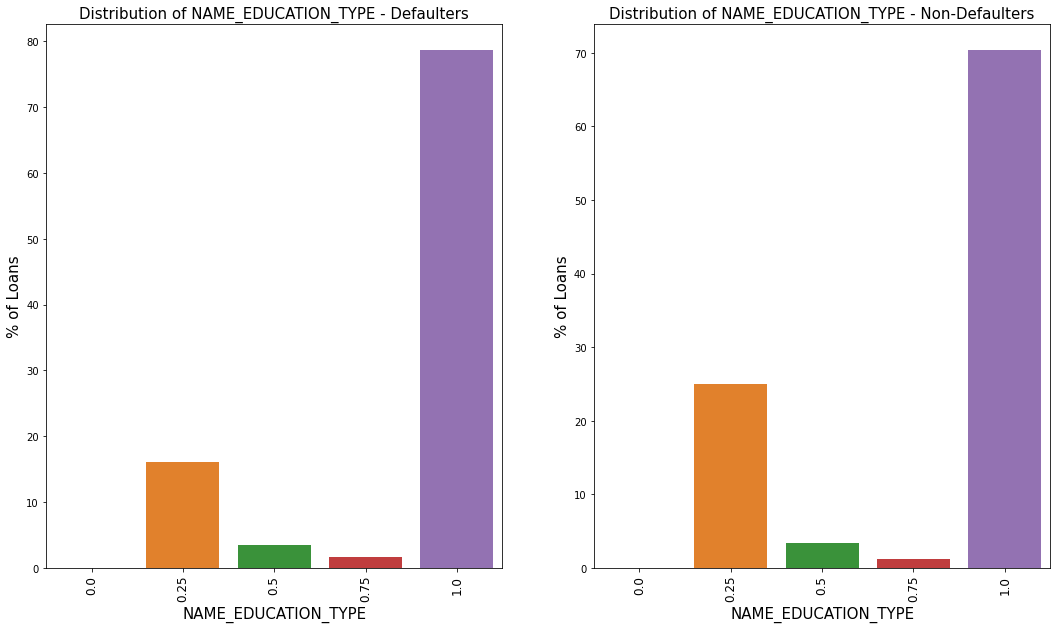

In [15]:
biplot(df, 'NAME_EDUCATION_TYPE', True)

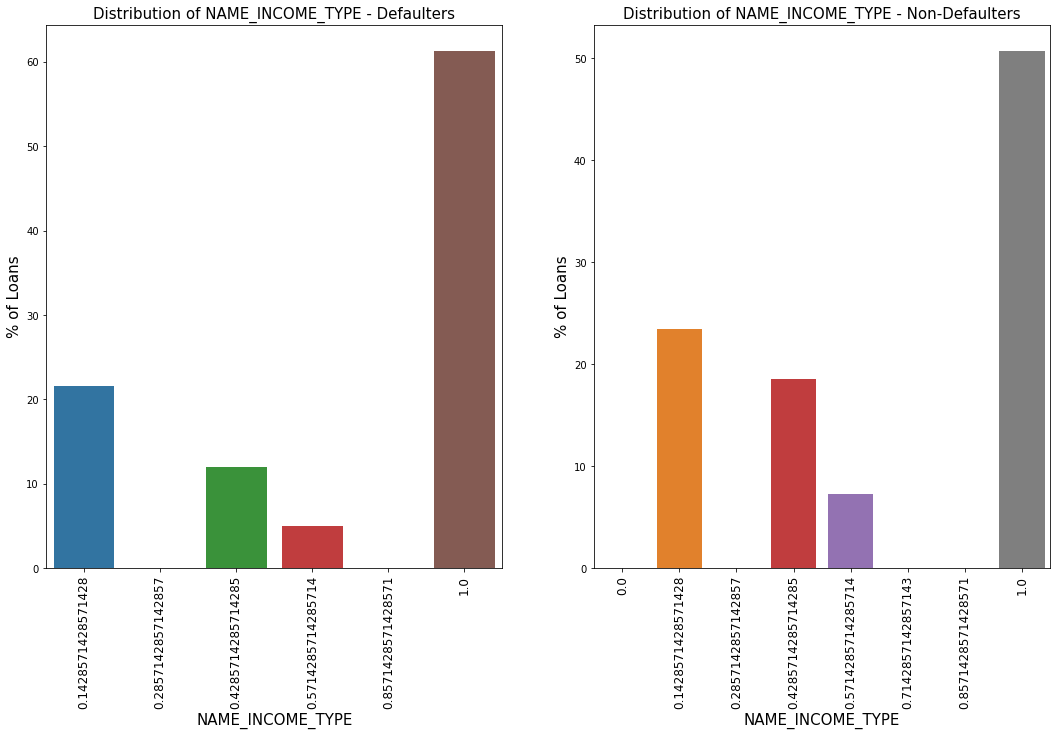

In [16]:
biplot(df, 'NAME_INCOME_TYPE', True)

In [17]:
#function for plotting categories based on defaulters and non-defaulters for organization type
def biplot_orgtype(data, var,label_rotation):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(40,15))
    s1=sns.countplot(ax=ax1,x=defaulters[var], data=defaulters, order= defaulters[var].value_counts().index)
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90,fontsize=18)
    ax1.set_title('Distribution of '+ '%s' %var +' - Defaulters', fontsize=15)
    ax1.set_xlabel('%s' %var,fontsize=15)
    ax1.set_ylabel("Count of Loans",fontsize=15)
   
    s2=sns.countplot(ax=ax2,x=nondefaulters[var], data=nondefaulters, order= nondefaulters[var].value_counts().index)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90,fontsize=18)
    ax2.set_xlabel('%s' %var, fontsize=15)
    ax2.set_ylabel("Count of Loans", fontsize=15)
    ax2.set_title('Distribution of '+ '%s' %var +' - Non-Defaulters', fontsize=15)
    plt.show()

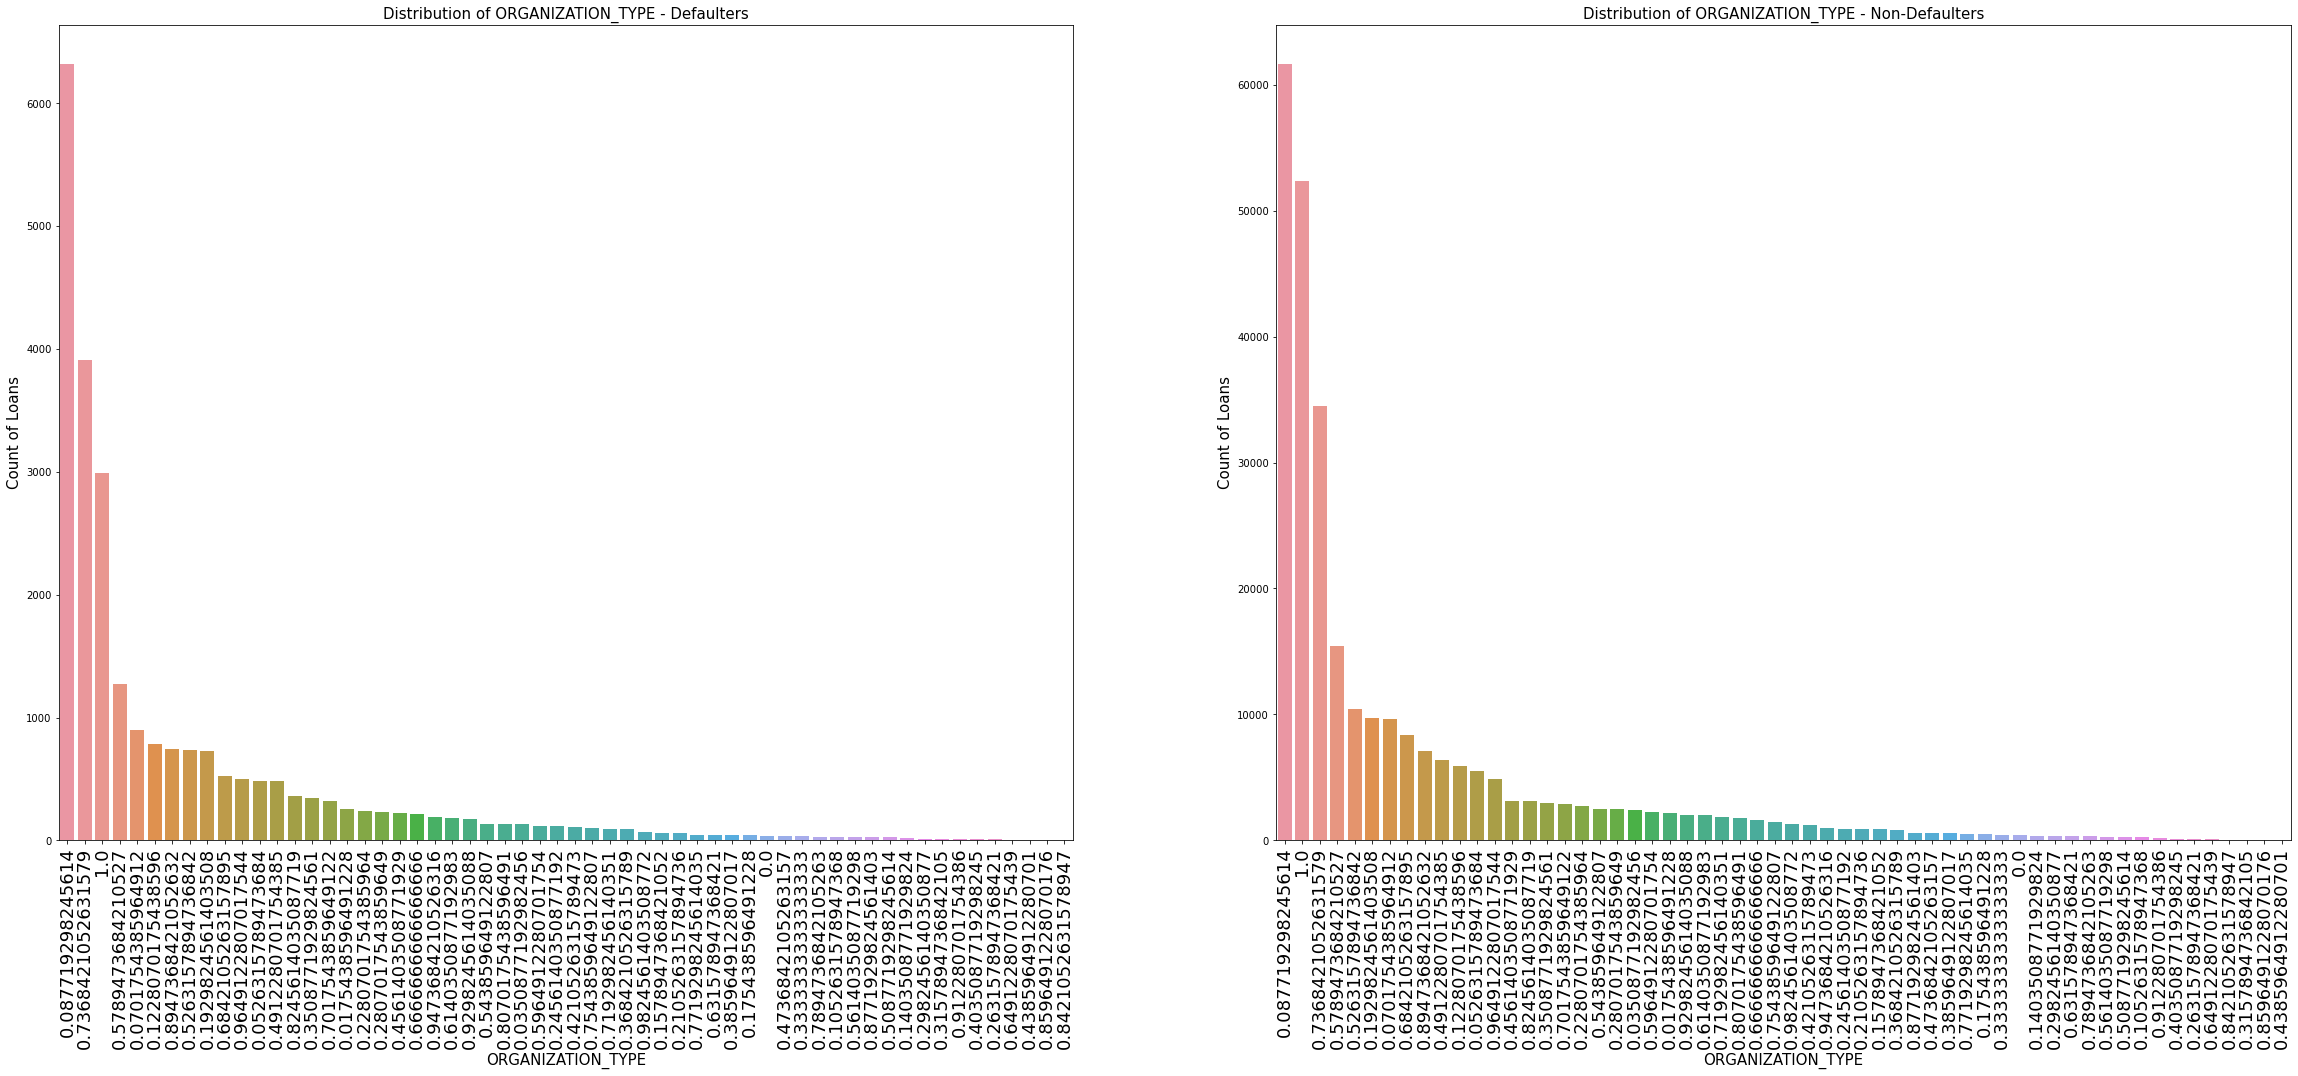

In [18]:
biplot_orgtype(df, 'ORGANIZATION_TYPE', True)

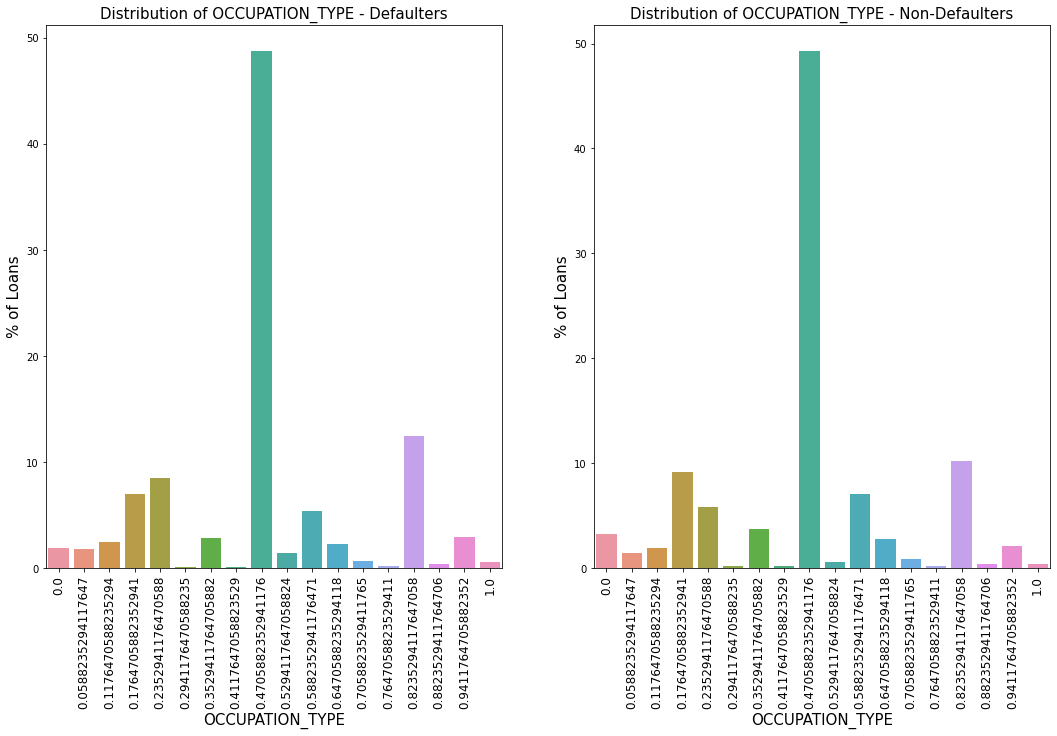

In [19]:
biplot(df, 'OCCUPATION_TYPE', True)

In [20]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075090e+05
mean     1.687975e+05
std      2.371238e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [21]:
defaulters.loc[:,'INCOME_BRACKET']=pd.qcut(df.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'INCOME_BRACKET']=pd.qcut(df.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])

C:\Users\surya\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\surya\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\surya\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

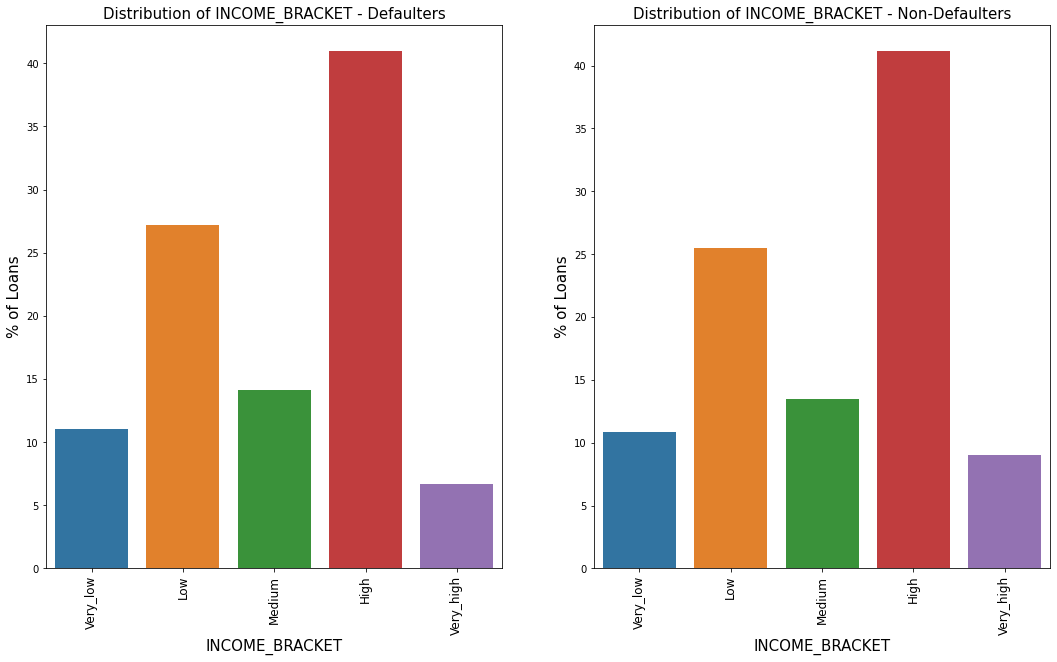

In [22]:
biplot(df, 'INCOME_BRACKET', True)